# Multilevel Regression

Download the `Bressoux Data AnPsycho.xls` dataset from the following OSF repository: https://osf.io/q7zph/.
Load it into R.

In [1]:
library(tidyverse)
library(readxl)

── Attaching packages ───────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
data = read_excel('~/git/r-seminar/data/Bressoux Data AnPsycho.xls')

In [4]:
glimpse(data)

Rows: 609
Columns: 38
$ NUMELEVE  <dbl> 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, …
$ FRAN4     <dbl> -1.03844718, 0.05081523, -1.32558075, 0.24899764, -1.3255807…
$ CPBIS     <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ CE1BIS    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ CE2BIS    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ CM1BIS    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ CM2BIS    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ MATH4     <dbl> -0.84660133, -0.90465749, -0.90465749, 0.06410083, -0.628770…
$ ECOLE2    <dbl> 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, …
$ CLASSE2   <dbl> 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 7, 7, …
$ COURS2    <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ RDBLT2    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ FRAN3     <dbl> 

This dataset contains the beginning and end of year score at standardized French and Math tests in 16 different French psrimary schools. It comes with additional demographic and school information.

Let's say that we are interested in understanding the relationship between the beginning and end of the year scores.

By simply plotting them using scatterplots, we see that there likely is a strong relationship between the 2:

In [42]:
# only for notebooks
options(repr.plot.width = 5, repr.plot.height = 5)

`geom_smooth()` using formula 'y ~ x'



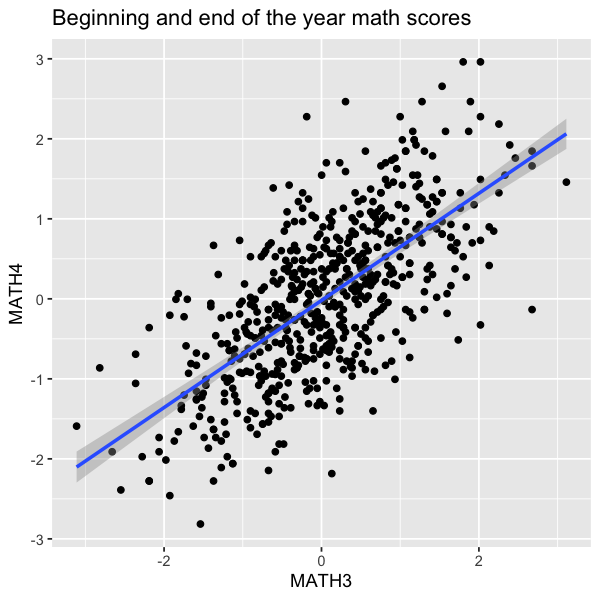

In [43]:
ggplot(data = data, mapping = aes(x = MATH3, y = MATH4)) + 
    geom_point() + 
    geom_smooth(method='lm') +
    ggtitle("Beginning and end of the year math scores")

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 7 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 7 rows containing missing values (geom_point).”


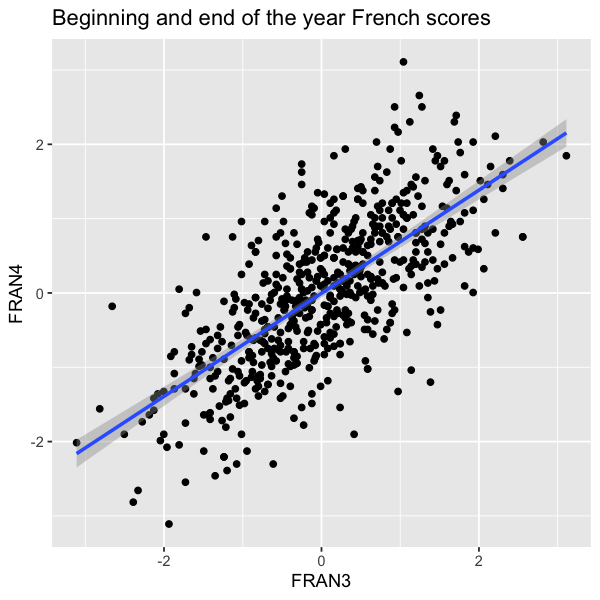

In [44]:
ggplot(data = data, mapping = aes(x = FRAN3, y = FRAN4)) + 
    geom_point() + 
    geom_smooth(method='lm') +
    ggtitle("Beginning and end of the year French scores")

However, as we mentioned in the lecture on regression models, we are assuming that the residuals in the data are independent and that there is homogeneity of variance. These assumptions are likely violated when we collect data in groups, as in this example. Here, the data were collected across different schools and classes. What tells us that the effect we are looking for is: 
1) as strong across all schools (so that it makes sense to have a common slope)? 
2) the baseline scores are the same across groups (so that it makes sense to have a common intercept)?

We cannot answer these questions using a regression... we need a model that takes into account that the data are **hierarchical**, which means that they already have a structure, since they were collected in multiple levels (in this case, classes and schools), and that they are therefore not all interchangeable. These models are called, indeed, hierarchical or multilevel models (https://en.wikipedia.org/wiki/Multilevel_model). The package in R to fit such models is `lme4`.

**Note**: By using the `facet_grid` function in `ggplot`, we can already have an idea of potential differences in slopes and intercepts across schools, but the more complex the models and the more levels there are, this might not be enough.

In [46]:
# only for notebooks
options(repr.plot.width = 20, repr.plot.height = 5)

`geom_smooth()` using formula 'y ~ x'



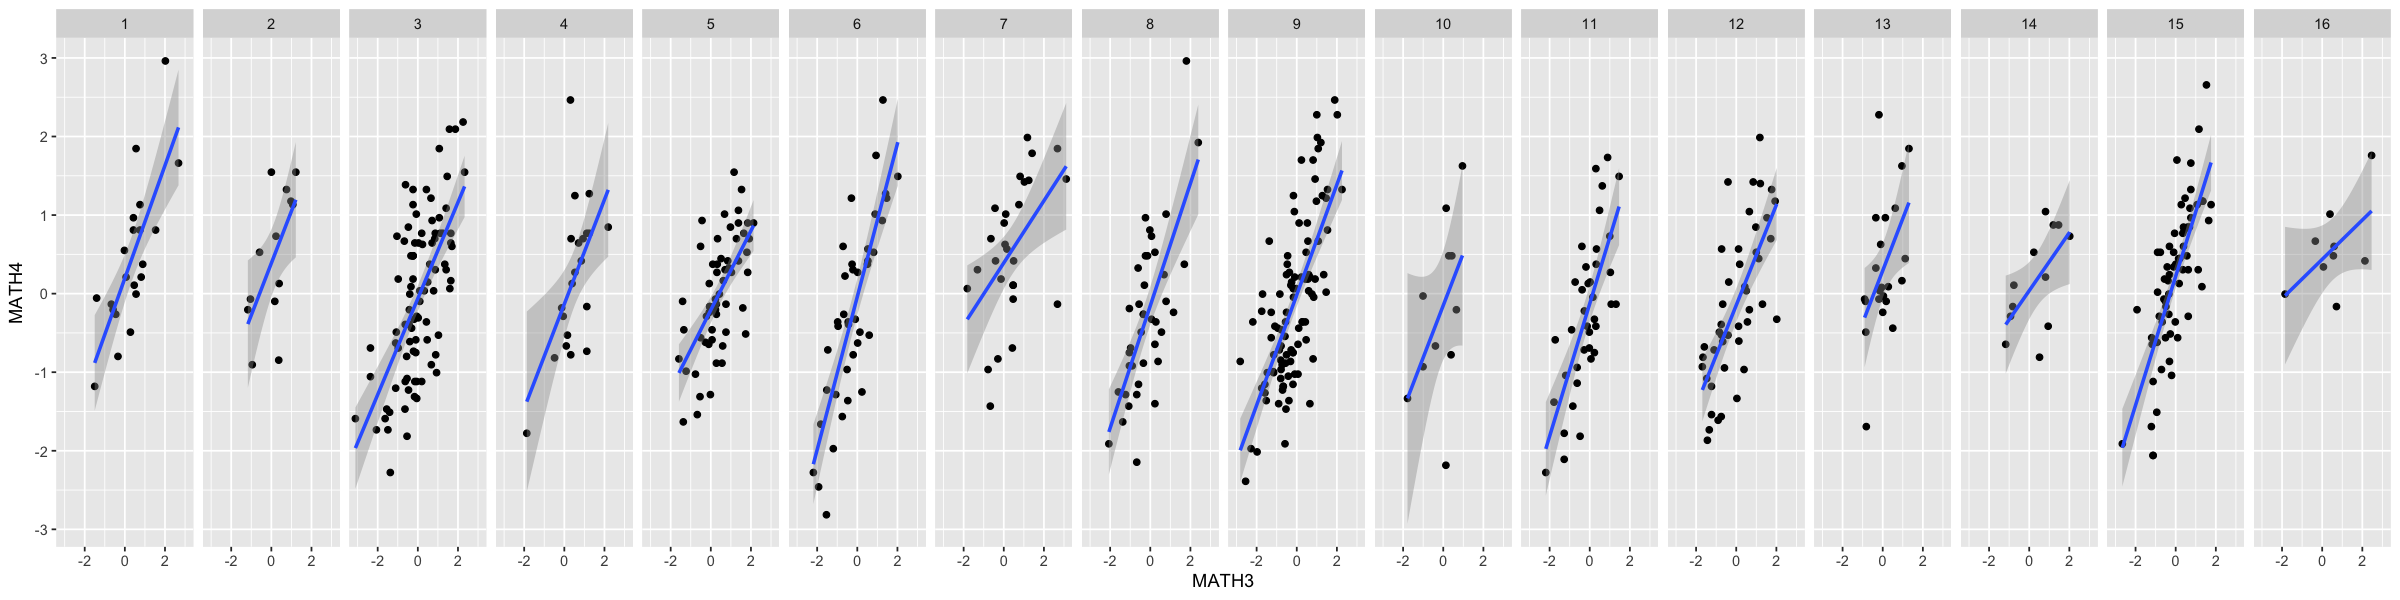

In [47]:
ggplot(data = data, mapping = aes(x = MATH3, y = MATH4)) + 
    geom_point() + 
    geom_smooth(method='lm') +
    facet_grid(~ ECOLE2)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 7 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 7 rows containing missing values (geom_point).”


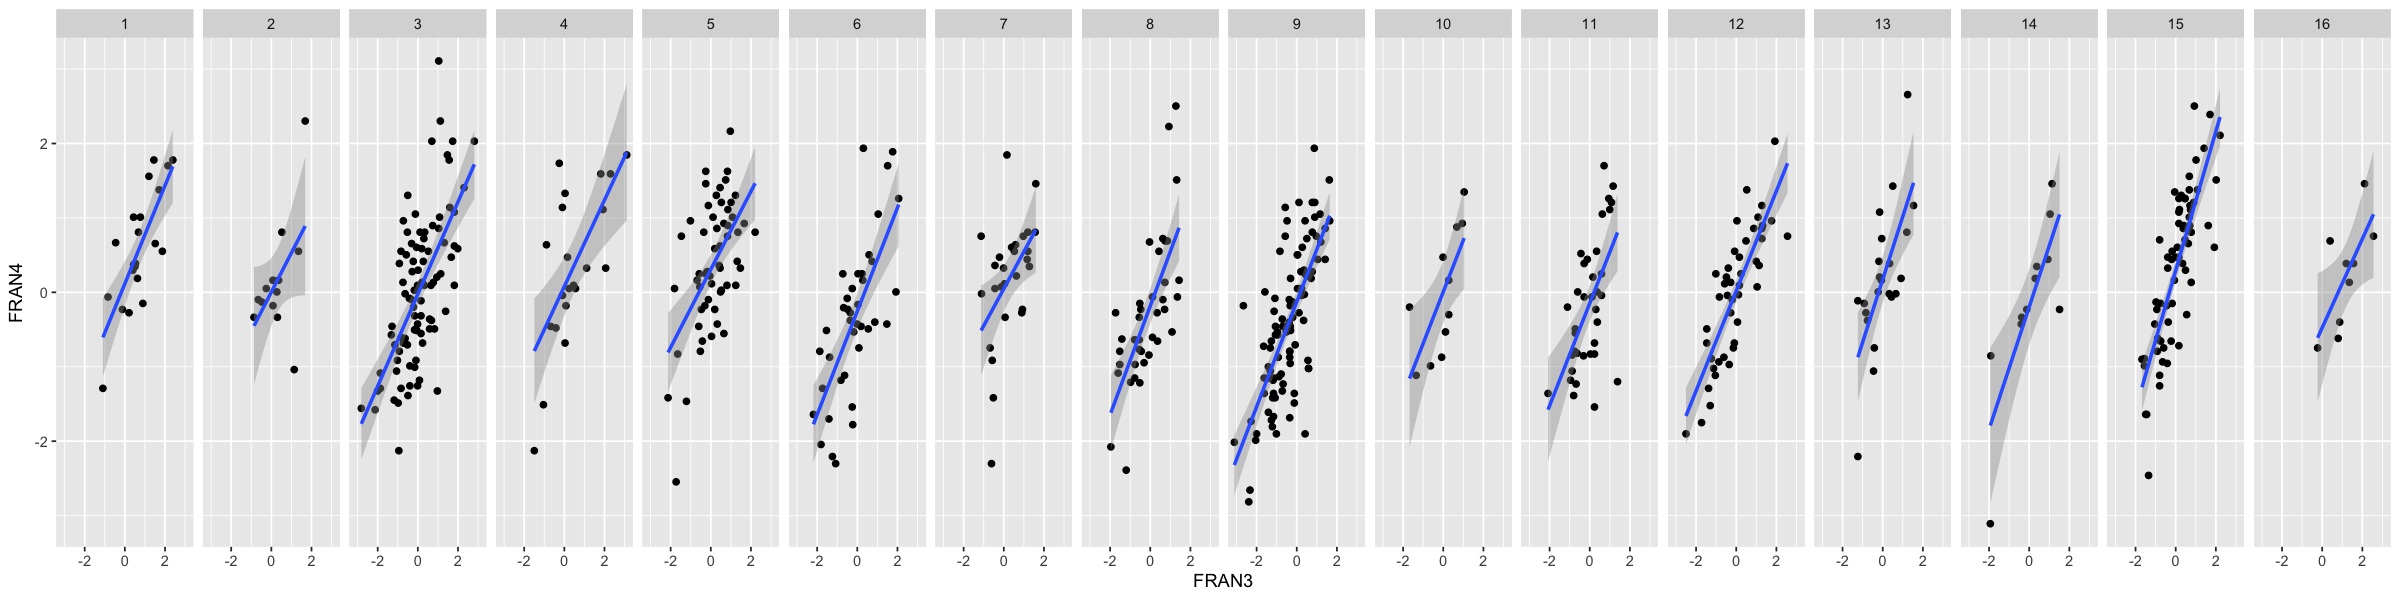

In [49]:
ggplot(data = data, mapping = aes(x = FRAN3, y = FRAN4)) + 
    geom_point() + 
    geom_smooth(method='lm') +
    facet_grid(~ ECOLE2)

## Types of models

Multilevel models differ according to whether parameter values (slopes and intercept parameters) are fixed or random. **Fixed parameters** are composed of a constant over all the groups, whereas a **random parameter** has a different value for each of the groups. 

Here an overview also on more complex models: https://rpsychologist.com/r-guide-longitudinal-lme-lmer

In [50]:
library(lme4)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




In [60]:
lm(MATH4 ~ MATH3, data = data)


Call:
lm(formula = MATH4 ~ MATH3, data = data)

Coefficients:
(Intercept)        MATH3  
   -0.01994      0.66935  


In [52]:
# Run a random intercept model
randintmodel = lmer(MATH4 ~ MATH3 + (1 | ECOLE2), data = data)

summary(randintmodel)

Linear mixed model fit by REML ['lmerMod']
Formula: MATH4 ~ MATH3 + (1 | ECOLE2)
   Data: data

REML criterion at convergence: 1349.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0893 -0.7001 -0.0063  0.6434  3.2304 

Random effects:
 Groups   Name        Variance Std.Dev.
 ECOLE2   (Intercept) 0.02227  0.1492  
 Residual             0.51801  0.7197  
Number of obs: 609, groups:  ECOLE2, 16

Fixed effects:
             Estimate Std. Error t value
(Intercept) -0.001068   0.050220  -0.021
MATH3        0.669708   0.029810  22.466

Correlation of Fixed Effects:
      (Intr)
MATH3 -0.051

The output of lmer consists of three parts:
1. The first part under Formula: and Data: reports a range of summary statistics (AIC, BIC, LogLik,…). 
2. The second part under Random effects: summarises the variance and standard deviation of each random effect (including the level 1 model residuals). Underneath the random effects table, the total number of observations is provided along with the number of units (or groups) for each higher level in the model. Here, schools are our only higher level and the output reports that we have 16 different schools.
3. The final part of the output is the Fixed effects: table which reports the parameter estimate (Estimate) standard error (Std. Error) and t-value (t value), for each parameter in the model. For models with more than one fixed part explanatory variable (including the intercept), a correlation table between these variables is also provided underneath the table of parameter estimates.

In [61]:
lm(MATH4 ~ 0 + MATH3, data = data)


Call:
lm(formula = MATH4 ~ 0 + MATH3, data = data)

Coefficients:
 MATH3  
0.6685  


In [55]:
# Run a random slope model
randslopemodel = lmer(MATH4 ~ MATH3 + (0 + MATH3 | ECOLE2), data = data)

summary(randslopemodel)

Linear mixed model fit by REML ['lmerMod']
Formula: MATH4 ~ MATH3 + (0 + MATH3 | ECOLE2)
   Data: data

REML criterion at convergence: 1353.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1289 -0.7110 -0.0147  0.6796  3.3283 

Random effects:
 Groups   Name  Variance Std.Dev.
 ECOLE2   MATH3 0.01452  0.1205  
 Residual       0.52448  0.7242  
Number of obs: 609, groups:  ECOLE2, 16

Fixed effects:
             Estimate Std. Error t value
(Intercept) -0.006598   0.029762  -0.222
MATH3        0.670032   0.045316  14.786

Correlation of Fixed Effects:
      (Intr)
MATH3 -0.049

In [56]:
# Run a random intercept & slope model
randintslopemodel = lmer(MATH4 ~ MATH3 + (MATH3 | ECOLE2), data = data)

summary(randintslopemodel)

Linear mixed model fit by REML ['lmerMod']
Formula: MATH4 ~ MATH3 + (MATH3 | ECOLE2)
   Data: data

REML criterion at convergence: 1345.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1355 -0.6860  0.0164  0.6357  3.2543 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 ECOLE2   (Intercept) 0.02349  0.1533        
          MATH3       0.01424  0.1193   -0.21
 Residual             0.50693  0.7120        
Number of obs: 609, groups:  ECOLE2, 16

Fixed effects:
            Estimate Std. Error t value
(Intercept)  0.01591    0.05123   0.311
MATH3        0.66203    0.04521  14.643

Correlation of Fixed Effects:
      (Intr)
MATH3 -0.172

## Now it's your turn

1. Create a new variable in the dataset, called `improvement_math`, which is the difference between `MATH4` and `MATH3`; and `improvement_french` which is the difference between `FRAN4` and `FRAN3`.
2. Run a multilevel model (separately for math and french), in which the improvement in math and french is predicted by at least 2 variables of your choice in the dataset, and that takes into account the school level. Run a random slope model, a random intercept model, and a random slope and intercept model.

3. (extra) Collapse the data across classrooms. Can you look at the effect of the number of student per classrrom on the improvements of math and french, taking into account the school level as well?